In [50]:
# to do:
# - import dataset
# - explorer (noms des columns, taille, valeurs manquantes, valeurs uniques, type de données)
# - visualisation (histogramme, boxplot, scatterplot, heatmap, pairplot)
# - nettoyage (valeurs manquantes, valeurs aberrantes, valeurs dupliquées, valeurs incohérentes)
# - feature engineering (création de nouvelles variables, transformation de variables, sélection de variables)

In [51]:
%pip install pandas numpy matplotlib seaborn cartopy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime

warnings.filterwarnings('ignore')

In [52]:
landslides = pd.read_csv('data\Global_Landslide_Catalog_Export.csv', sep=';')
landslides.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,"36,619",Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,Junín,"14,708",San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,"1,067",07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,"20,908",Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,"2,603",10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,"798,634",Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [53]:
landslides[["event_date", "event_hour", "eventAmOrPm"]]= landslides["event_date"].str.split(expand= True)
# landslides["event_hour"]=datetime(landslides["event_hour"])
landslides

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude,event_hour,eventAmOrPm
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.450000,32.562500,12:00:00,AM
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,"36,619",Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.663000,45.420000,02:00:00,AM
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,"14,708",San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.358700,-11.129500,12:00:00,AM
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,"1,067",07/31/2009,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,"20,908",Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.708000,28.837800,12:00:00,AM
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,"2,603",10/16/2010,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,"798,634",Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.897800,10.333600,12:00:00,PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,"11,109",04/01/2017,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,NaN,NaN,NaN,07/28/2017 01:34:00 PM,12/19/2017 09:42:00 PM,02/15/2018 03:51:00 PM,111.679944,-7.853409,01:34:00,PM
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,"10,845",03/25/2017,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,NaN,NaN,NaN,09/21/2017 05:32:00 PM,12/05/2017 06:45:00 PM,02/15/2018 03:51:00 PM,75.680611,33.403080,05:32:00,PM
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,"10,973",12/15/2016,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,NaN,NaN,NaN,07/26/2017 01:22:00 PM,12/08/2017 08:37:00 PM,02/15/2018 03:51:00 PM,91.772042,26.181606,05:00:00,AM
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,"10,901",04/29/2017,NaN,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,NaN,NaN,NaN,07/14/2017 07:03:00 PM,12/07/2017 09:19:00 PM,02/15/2018 03:51:00 PM,73.472379,40.886395,07:03:00,PM


In [54]:
landslides[["event_hour", "event_minute", "event_second"]]= landslides["event_hour"].str.split(':',expand= True)
landslides

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude,event_hour,eventAmOrPm,event_minute,event_second
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.450000,32.562500,12,AM,00,00
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.663000,45.420000,02,AM,00,00
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.358700,-11.129500,12,AM,00,00
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,"1,067",07/31/2009,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.708000,28.837800,12,AM,00,00
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,"2,603",10/16/2010,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.897800,10.333600,12,PM,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,"11,109",04/01/2017,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,NaN,07/28/2017 01:34:00 PM,12/19/2017 09:42:00 PM,02/15/2018 03:51:00 PM,111.679944,-7.853409,01,PM,34,00
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,"10,845",03/25/2017,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,NaN,09/21/2017 05:32:00 PM,12/05/2017 06:45:00 PM,02/15/2018 03:51:00 PM,75.680611,33.403080,05,PM,32,00
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,"10,973",12/15/2016,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,NaN,07/26/2017 01:22:00 PM,12/08/2017 08:37:00 PM,02/15/2018 03:51:00 PM,91.772042,26.181606,05,AM,00,00
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,"10,901",04/29/2017,NaN,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,NaN,07/14/2017 07:03:00 PM,12/07/2017 09:19:00 PM,02/15/2018 03:51:00 PM,73.472379,40.886395,07,PM,03,00


In [56]:
landslides[["event_date_day", "event_date_month", "event_date_year"]]= landslides["event_date"].str.split('/',expand= True)
# landslides[["event_time2"]]= landslides["event_date"].str.split('/',expand= True).concat()
landslides

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,last_edited_date,longitude,latitude,event_hour,eventAmOrPm,event_minute,event_second,event_date_day,event_date_month,event_date_year
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,02/15/2018 03:51:00 PM,107.450000,32.562500,12,AM,00,00,08,01,2008
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,02/15/2018 03:51:00 PM,-122.663000,45.420000,02,AM,00,00,01,02,2009
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,02/15/2018 03:51:00 PM,-75.358700,-11.129500,12,AM,00,00,01,19,2007
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,"1,067",07/31/2009,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,02/15/2018 03:51:00 PM,81.708000,28.837800,12,AM,00,00,07,31,2009
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,"2,603",10/16/2010,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,02/15/2018 03:51:00 PM,123.897800,10.333600,12,PM,00,00,10,16,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,"11,109",04/01/2017,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,02/15/2018 03:51:00 PM,111.679944,-7.853409,01,PM,34,00,04,01,2017
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,"10,845",03/25/2017,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,02/15/2018 03:51:00 PM,75.680611,33.403080,05,PM,32,00,03,25,2017
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,"10,973",12/15/2016,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,02/15/2018 03:51:00 PM,91.772042,26.181606,05,AM,00,00,12,15,2016
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,"10,901",04/29/2017,NaN,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,02/15/2018 03:51:00 PM,73.472379,40.886395,07,PM,03,00,04,29,2017


In [57]:
landslides["event_hour"]= landslides["event_hour"].astype(int)

In [58]:
landslides.loc[landslides['eventAmOrPm'] == 'PM', 'event_hour'] = landslides.loc[landslides['eventAmOrPm'] == 'PM', 'event_hour'] + 12
landslides

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,last_edited_date,longitude,latitude,event_hour,eventAmOrPm,event_minute,event_second,event_date_day,event_date_month,event_date_year
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,02/15/2018 03:51:00 PM,107.450000,32.562500,12,AM,00,00,08,01,2008
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,02/15/2018 03:51:00 PM,-122.663000,45.420000,2,AM,00,00,01,02,2009
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,02/15/2018 03:51:00 PM,-75.358700,-11.129500,12,AM,00,00,01,19,2007
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,"1,067",07/31/2009,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,02/15/2018 03:51:00 PM,81.708000,28.837800,12,AM,00,00,07,31,2009
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,"2,603",10/16/2010,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,02/15/2018 03:51:00 PM,123.897800,10.333600,24,PM,00,00,10,16,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,"11,109",04/01/2017,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,02/15/2018 03:51:00 PM,111.679944,-7.853409,13,PM,34,00,04,01,2017
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,"10,845",03/25/2017,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,02/15/2018 03:51:00 PM,75.680611,33.403080,17,PM,32,00,03,25,2017
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,"10,973",12/15/2016,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,02/15/2018 03:51:00 PM,91.772042,26.181606,5,AM,00,00,12,15,2016
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,"10,901",04/29/2017,NaN,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,02/15/2018 03:51:00 PM,73.472379,40.886395,19,PM,03,00,04,29,2017


In [59]:
# exploration

# columns names
print("Columns names: \n", landslides.columns)

# size
print("\nSize: ", landslides.shape)

# data types
print("\nData types: \n", landslides.dtypes)


Columns names: 
 Index(['source_name', 'source_link', 'event_id', 'event_date', 'event_time',
       'event_title', 'event_description', 'location_description',
       'location_accuracy', 'landslide_category', 'landslide_trigger',
       'landslide_size', 'landslide_setting', 'fatality_count', 'injury_count',
       'storm_name', 'photo_link', 'notes', 'event_import_source',
       'event_import_id', 'country_name', 'country_code',
       'admin_division_name', 'admin_division_population',
       'gazeteer_closest_point', 'gazeteer_distance', 'submitted_date',
       'created_date', 'last_edited_date', 'longitude', 'latitude',
       'event_hour', 'eventAmOrPm', 'event_minute', 'event_second',
       'event_date_day', 'event_date_month', 'event_date_year'],
      dtype='object')

Size:  (11033, 38)

Data types: 
 source_name                   object
source_link                   object
event_id                      object
event_date                    object
event_time                

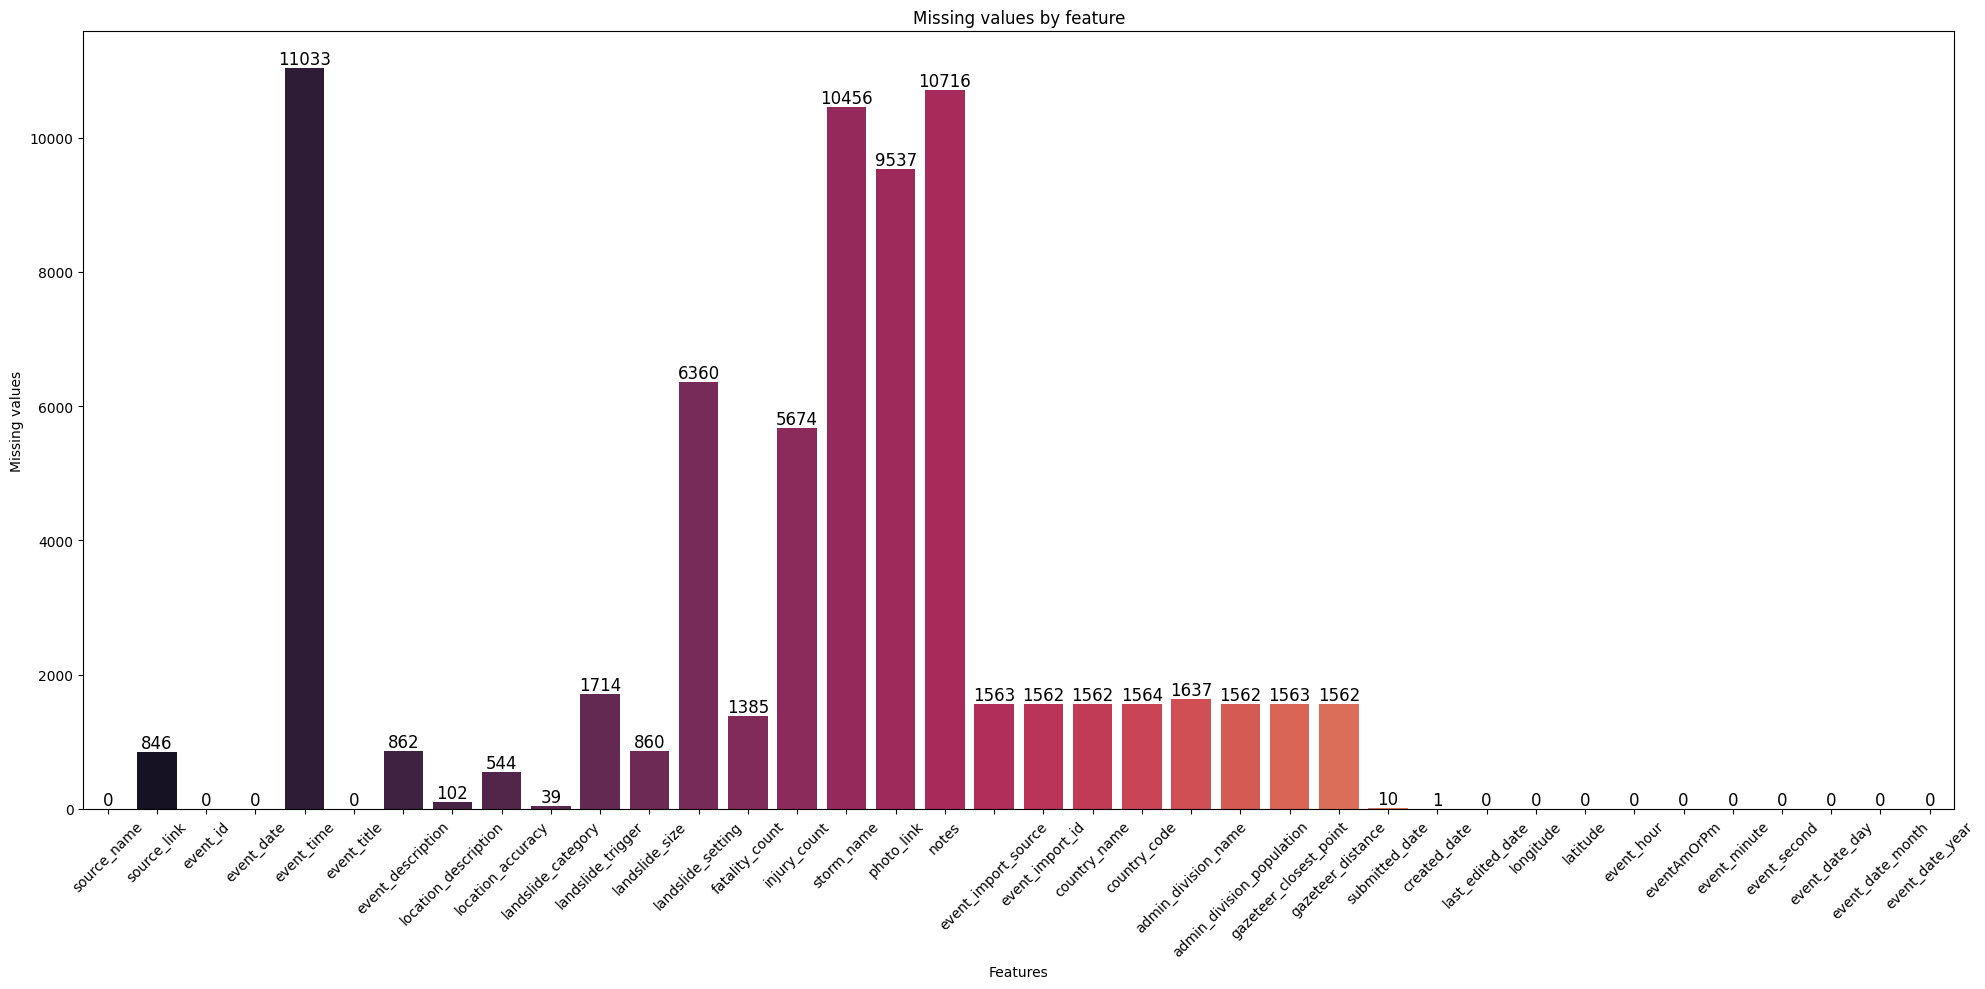

In [60]:

# missing values
missing_values = landslides.isnull().sum() + landslides.applymap(lambda x: (str)(x).strip() == 'unknown').sum() 

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=missing_values.index, y=missing_values, palette="rocket") #order=missing_values.sort_values(ascending=False).index
# for i in ax.containers:
#     ax.bar_label(i,)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Missing values')
plt.title('Missing values by feature')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'unique values')

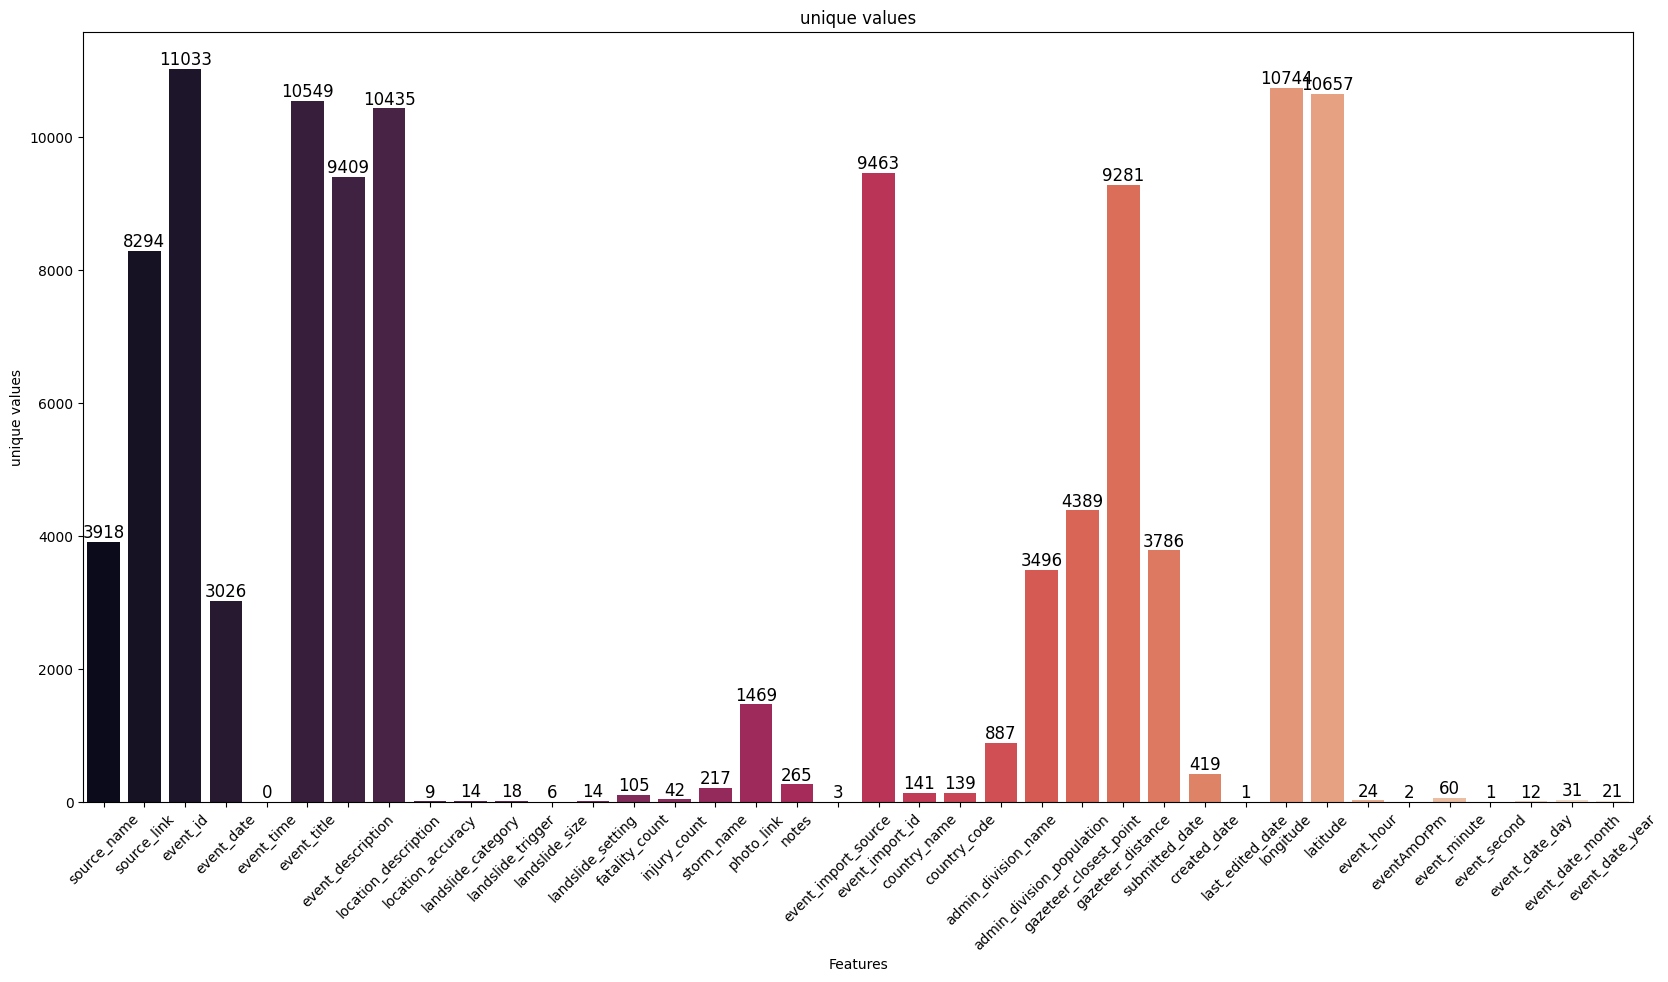

In [61]:



unique_values =  landslides.nunique()

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=unique_values.index, y=unique_values, palette="rocket") #order=missing_values.sort_values(ascending=False).index
# for i in ax.containers:
#     ax.bar_label(i,)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('unique values')
plt.title('unique values')

Text(0.5, 1.0, 'unique values')

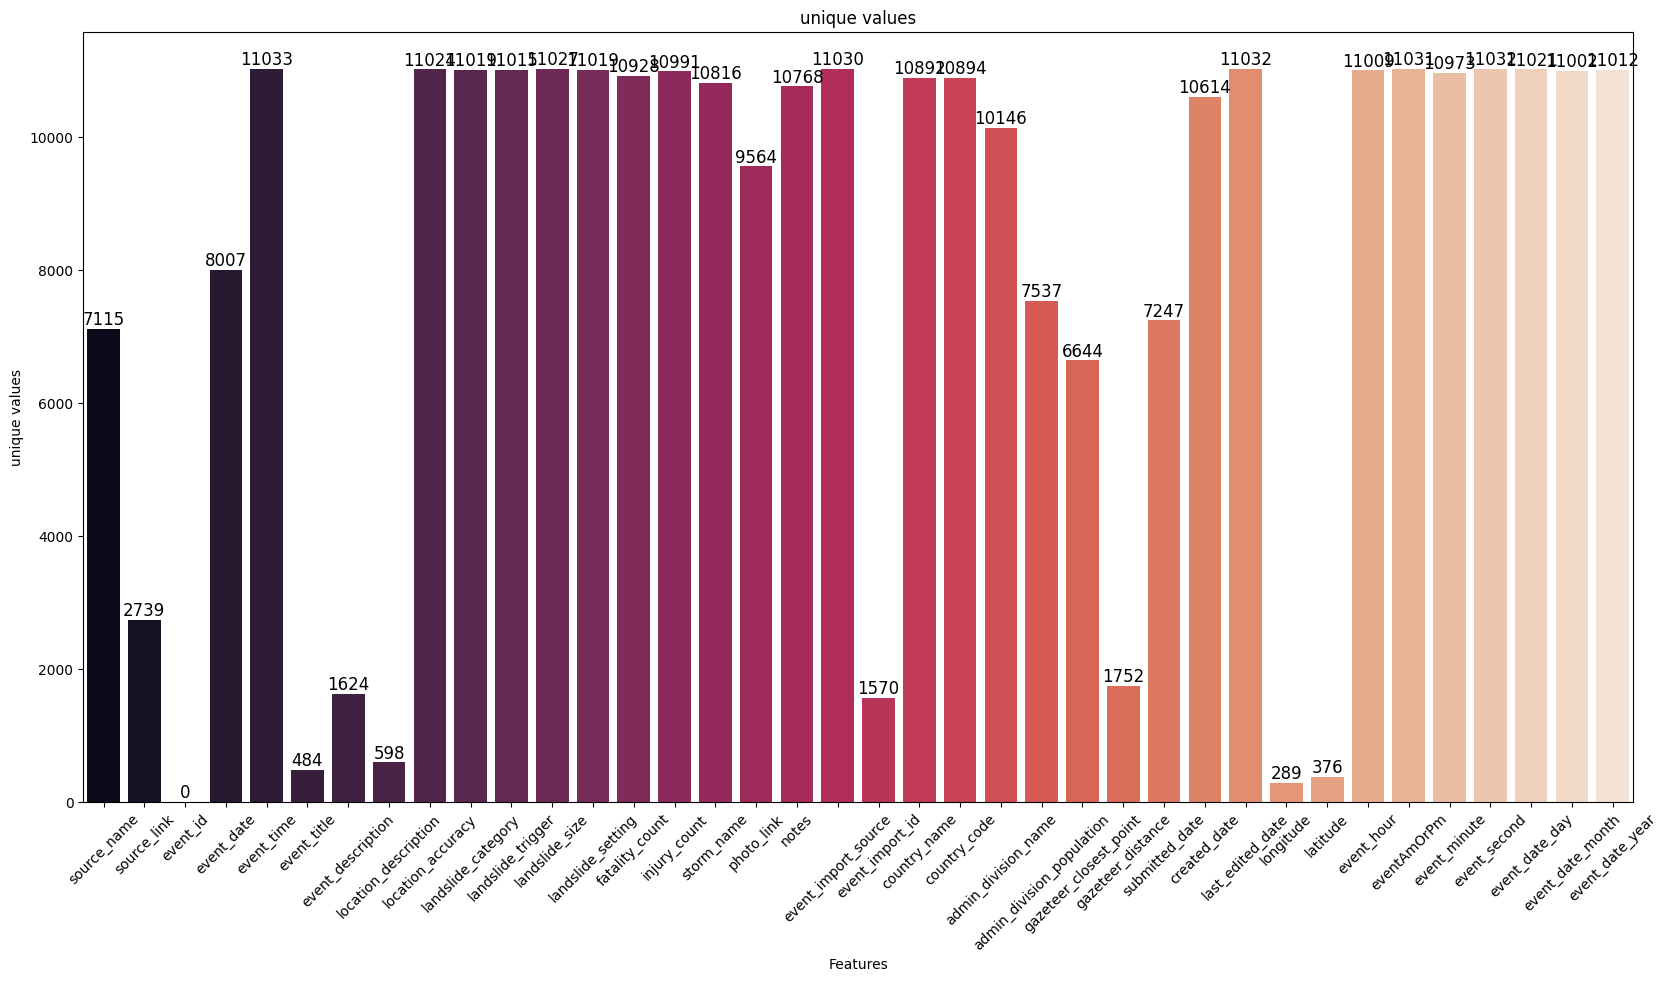

In [62]:
non_unique_values =  len(landslides)-landslides.nunique()

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=non_unique_values.index, y=non_unique_values, palette="rocket") #order=missing_values.sort_values(ascending=False).index
# for i in ax.containers:
#     ax.bar_label(i,)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('unique values')
plt.title('unique values')

In [63]:
duplicateRowsDF = landslides[landslides.duplicated()]
duplicateRowsDF

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,last_edited_date,longitude,latitude,event_hour,eventAmOrPm,event_minute,event_second,event_date_day,event_date_month,event_date_year


In [68]:
duplicateRowsDF['event_date']=duplicateRowsDF['event_date'].astype(str)
duplicateRowsDF.dtypes

source_name                   object
source_link                   object
event_id                      object
event_date                    object
event_time                   float64
event_title                   object
event_description             object
location_description          object
location_accuracy             object
landslide_category            object
landslide_trigger             object
landslide_size                object
landslide_setting             object
fatality_count                object
injury_count                 float64
storm_name                    object
photo_link                    object
notes                         object
event_import_source           object
event_import_id               object
country_name                  object
country_code                  object
admin_division_name           object
admin_division_population     object
gazeteer_closest_point        object
gazeteer_distance            float64
submitted_date                object
c

In [80]:
duplicateRowsDF = landslides[landslides.duplicated(landslides[["event_date","event_hour","event_minute","country_name","landslide_category"]])]
duplicateRowsDF=duplicateRowsDF.sort_values(by="event_date")
duplicateRowsDF

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,last_edited_date,longitude,latitude,event_hour,eventAmOrPm,event_minute,event_second,event_date_day,event_date_month,event_date_year
1091,USGS,http://landslides.usgs.gov/recent/archives/199...,"7,826",01/01/1997,NaN,West Seattle,http://landslides.usgs.gov/recent/archives/199...,West Seattle,1km,debris_flow,...,02/15/2018 03:51:00 PM,-122.380700,47.587600,12,AM,00,00,01,01,1997
5998,USGS,http://landslides.usgs.gov/recent/archives/199...,"7,829",01/01/1997,NaN,Magnolia Area,NaN,Magnolia Area,1km,debris_flow,...,02/15/2018 03:51:00 PM,-122.414700,47.642200,12,AM,00,00,01,01,1997
9053,bigpondnews.com,http://bigpondnews.com/articles/TopStories/201...,"1,380",01/01/2010,NaN,"Victoria, Strathewen",It hasn't been a good start to the New Year fo...,"Victoria, Strathewen",10km,landslide,...,02/15/2018 03:51:00 PM,145.273700,-37.580300,23,PM,00,00,01,01,2010
7315,pia,http://www.pia.gov.ph/?m=1&t=1&id=9801,"2,925",01/02/2011,NaN,Barangay Mayuga in Libagon town,Landslides were reported at Barangay Mayuga in...,Barangay Mayuga in Libagon town,5km,landslide,...,02/15/2018 03:51:00 PM,125.066700,10.283300,12,AM,00,00,01,02,2011
7344,ABS-CBN,http://news.abs-cbn.com/nation/regions/01/03/1...,"2,924",01/02/2011,NaN,Barangay Imelda of Silago town,Landslides were also reported at Barangay Mayu...,Barangay Imelda of Silago town,5km,landslide,...,02/15/2018 03:51:00 PM,125.106609,10.571727,12,AM,00,00,01,02,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6183,www.thesundaily.my,http://www.thesundaily.my/news/916771,"5,737",12/30/2013,NaN,"Miri, Sarawak",Landslides triggered by heavy rain for almost ...,"Miri, Sarawak",unknown,landslide,...,02/15/2018 03:51:00 PM,113.835900,4.117600,12,AM,00,00,12,30,2013
8832,GMA News,http://www.gmanetwork.com/news/story/397089/ne...,"6,610",12/30/2014,NaN,boundary of Barangays Cabuynan and Sto. Nino i...,At least five people were killed in a landslid...,boundary of Barangays Cabuynan and Sto. Nino i...,10km,landslide,...,02/15/2018 03:51:00 PM,125.018300,11.108800,9,AM,00,00,12,30,2014
9498,City News Line,http://www.citynewsline.co.uk/news/landslip-ca...,"9,145",12/30/2015,NaN,between Inverness and Kyle of Lochals,A landslide at Garve is expected to cause disr...,between Inverness and Kyle of Lochals,1km,landslide,...,02/15/2018 03:51:00 PM,-4.690000,57.616000,12,AM,00,00,12,30,2015
8102,news.bbc,http://news.bbc.co.uk/2/hi/americas/8436388.stm,"1,376",12/31/2009,NaN,Greater Rio de Janeiro city area,Heavy rains have caused floods and landslides ...,Greater Rio de Janeiro city area,5km,mudslide,...,02/15/2018 03:51:00 PM,-43.204900,-22.915800,12,AM,00,00,12,31,2009


In [ ]:
landslides

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,last_edited_date,longitude,latitude,event_hour,eventAmOrPm,event_minute,event_second,event_date_day,event_date_month,event_date_year
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,02/15/2018 03:51:00 PM,107.450000,32.562500,12,AM,00,00,08,01,2008
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,02/15/2018 03:51:00 PM,-122.663000,45.420000,2,AM,00,00,01,02,2009
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,02/15/2018 03:51:00 PM,-75.358700,-11.129500,12,AM,00,00,01,19,2007
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,"1,067",07/31/2009,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,02/15/2018 03:51:00 PM,81.708000,28.837800,12,AM,00,00,07,31,2009
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,"2,603",10/16/2010,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,02/15/2018 03:51:00 PM,123.897800,10.333600,24,PM,00,00,10,16,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,"11,109",04/01/2017,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,02/15/2018 03:51:00 PM,111.679944,-7.853409,13,PM,34,00,04,01,2017
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,"10,845",03/25/2017,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,02/15/2018 03:51:00 PM,75.680611,33.403080,17,PM,32,00,03,25,2017
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,"10,973",12/15/2016,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,02/15/2018 03:51:00 PM,91.772042,26.181606,5,AM,00,00,12,15,2016
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,"10,901",04/29/2017,NaN,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,02/15/2018 03:51:00 PM,73.472379,40.886395,19,PM,03,00,04,29,2017


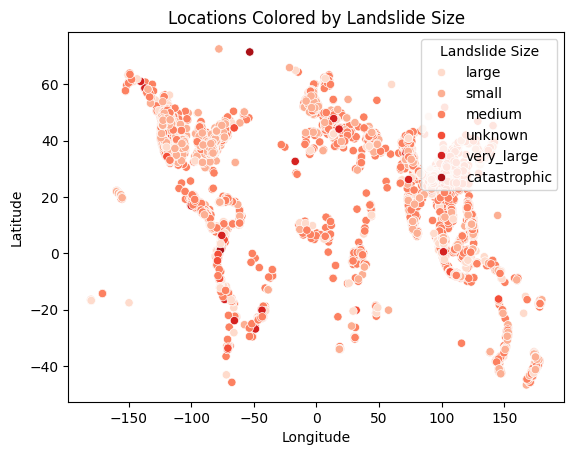

In [ ]:

# plot of world map representing landslide strength

scatter = sns.scatterplot(x='longitude', y='latitude', hue='landslide_size', data=landslides, palette='Reds')


# Getting legend handles and labels
handles, labels = scatter.get_legend_handles_labels()

# Creating the legend
plt.legend(handles, labels, title='Landslide Size', loc='upper right')
plt.title('Locations Colored by Landslide Size')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



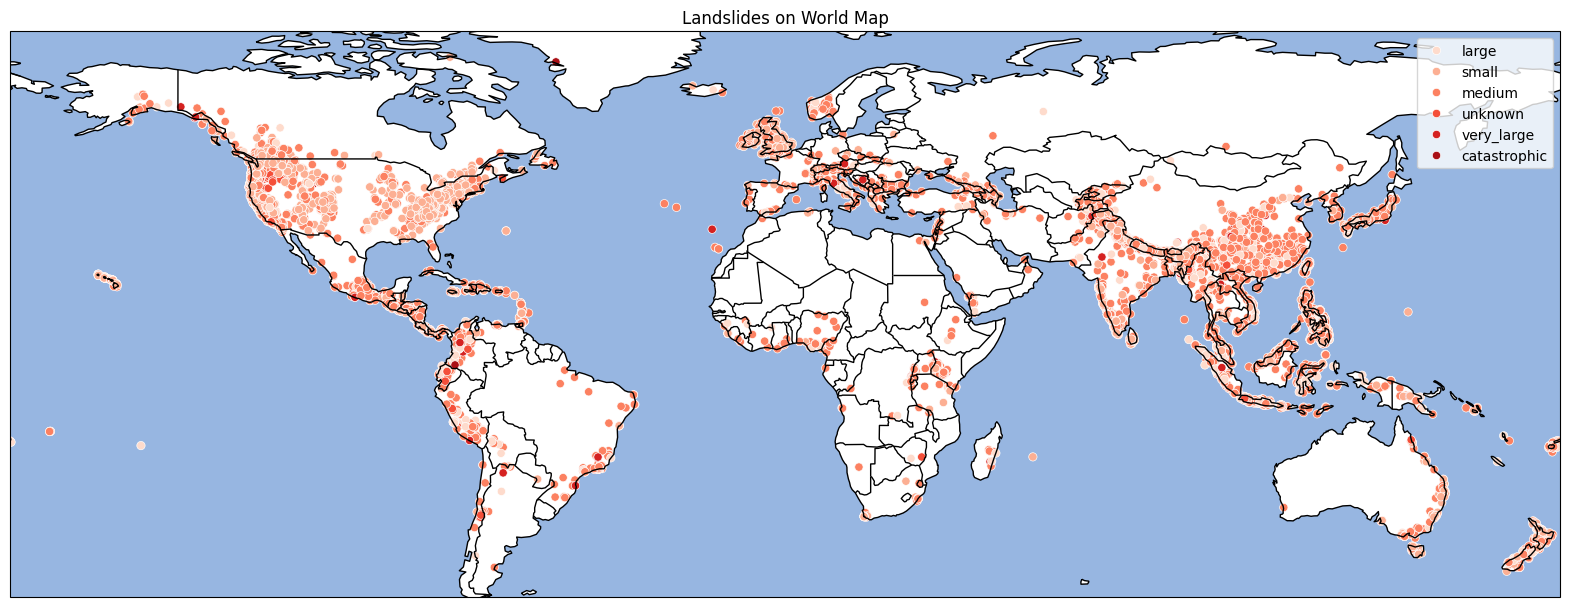

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Assuming you have longitude, latitude columns in your 'landslides' DataFrame
# Replace 'longitude' and 'latitude' with your actual column names
longitude = landslides['longitude']
latitude = landslides['latitude']

# Create a figure and axis with Cartopy projection
plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot world map
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.LAND, edgecolor='black')

# Plot scatter points on the map
#ax.scatter(longitude, latitude, transform=ccrs.PlateCarree(), s=5, color='blue', label='Landslides')
sns.scatterplot(x='longitude', y='latitude',transform=ccrs.PlateCarree(), hue='landslide_size', data=landslides, palette='Reds')

# Add legend
plt.legend()

# Show the plot
plt.title('Landslides on World Map')
plt.show()



In [ ]:
landslides


,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,last_edited_date,longitude,latitude,event_hour,eventAmOrPm,event_minute,event_second,event_date_day,event_date_month,event_date_year
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,02/15/2018 03:51:00 PM,107.450000,32.562500,12,AM,00,00,08,01,2008
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,02/15/2018 03:51:00 PM,-122.663000,45.420000,2,AM,00,00,01,02,2009
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,02/15/2018 03:51:00 PM,-75.358700,-11.129500,12,AM,00,00,01,19,2007
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,"1,067",07/31/2009,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,02/15/2018 03:51:00 PM,81.708000,28.837800,12,AM,00,00,07,31,2009
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,"2,603",10/16/2010,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,02/15/2018 03:51:00 PM,123.897800,10.333600,24,PM,00,00,10,16,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,"11,109",04/01/2017,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,02/15/2018 03:51:00 PM,111.679944,-7.853409,13,PM,34,00,04,01,2017
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,"10,845",03/25/2017,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,02/15/2018 03:51:00 PM,75.680611,33.403080,17,PM,32,00,03,25,2017
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,"10,973",12/15/2016,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,02/15/2018 03:51:00 PM,91.772042,26.181606,5,AM,00,00,12,15,2016
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,"10,901",04/29/2017,NaN,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,02/15/2018 03:51:00 PM,73.472379,40.886395,19,PM,03,00,04,29,2017
